# Predicting Breast Cancer 
## Part 3 : Random Forest Classification
### 1. Load Modules

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import time
import sys, os
import numpy as np
import pandas as pd
import helper_functions as hf
from helper_functions import training_set, class_set, test_set, test_class_set
from sklearn.model_selection import KFold, cross_val_score 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import roc_curve 
from sklearn.metrics import auc 
from sklearn.externals import joblib

pd.set_option('display.max_columns', 500) 
# Included to show all the columns 
# since it is a fairly large data set

plt.style.use('ggplot') # Using ggplot2 style visuals 

### 2. Loading Data

In [2]:
breast_cancer = hf.breast_cancer

In [3]:
# dimensions of our data frame
breast_cancer.shape

(569, 31)

In [4]:
# data types of our columns 
breast_cancer.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave_points_worst

### 3. Fitting model

In [5]:
fit_RF = RandomForestClassifier(random_state = 42, 
                                bootstrap=True,
                                max_depth=4,
                                criterion='entropy',
                                n_estimators = 500)

# Training model
fit_RF.fit(training_set, class_set['diagnosis'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [6]:
# Extracting feature importance
import_rf = fit_RF.feature_importances_

# Create indices for importance of features
ind_rf = np.argsort(import_rf)[::-1]

# Sort by Decreasing order
import_rf_desc = sorted(import_rf) 	

In [7]:
# Predictions for test set
predictions_RF = fit_RF.predict(test_set)	
accuracy_RF = fit_RF.score(test_set, test_class_set['diagnosis'])

In [8]:
# Here we calculate the test error rate!
test_error_rate_RF = 1 - accuracy_RF

In [9]:
# ROC Curve stuff
fpr2, tpr2, _ = roc_curve(predictions_RF,test_class_set)

auc_rf = auc(fpr2, tpr2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
Feature ranking:
1. The feature 'concave_points_worst' has a Information Gain of 0.143349
2. The feature 'area_worst' has a Information Gain of 0.123030
3. The feature 'perimeter_worst' has a Information Gain of 0.121727
4. The feature 'concave_points_mean' has a Information Gain of 0.110016
5. The feature 'radius_worst' has a Information Gain of 0.083120
6. The feature 'concavity_mean' has a Information Gain of 0.053719
7. The feature 'concavity_worst' has a Information Gain of 0.044348
8. The feature 'radius_mean' has a Information Gain of 0.044206
9. The feature 'perimeter_mean' has

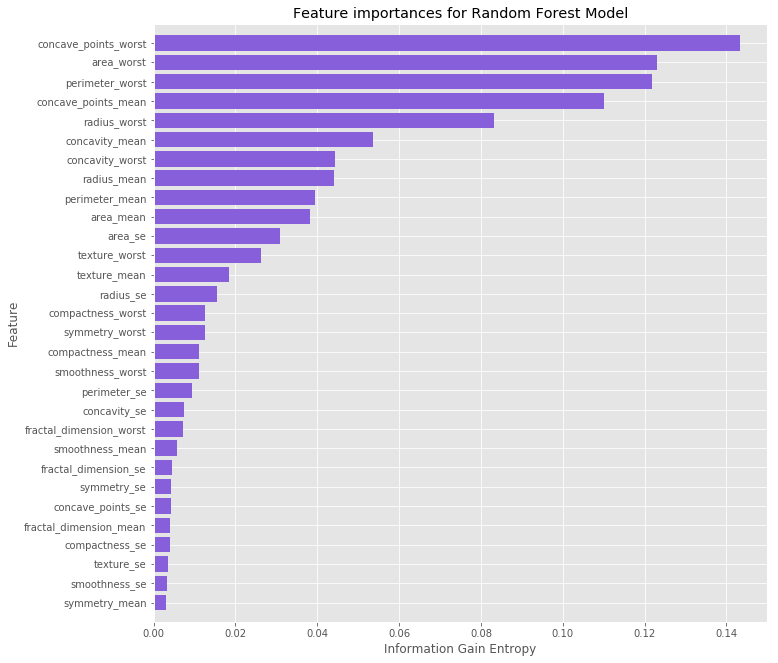


    ############################################
    ##      HYPERPARAMETER OPTIMIZATION       ##
    ############################################
    
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4}
129.97498512268066

    ###############################
    ##      CROSS VALIDATION     ##
    ###############################
    
Accuracy:  0.963 (+/-  0.013)

    ###############################
    ##   TEST SET CALCULATIONS   ##
    ###############################
    
Actual Values      0   1
Predicted Values        
0                 70   3
1                  1  40
Here is our mean accuracy on the test set:
  0.965
The test error rate for our model is:
  0.035


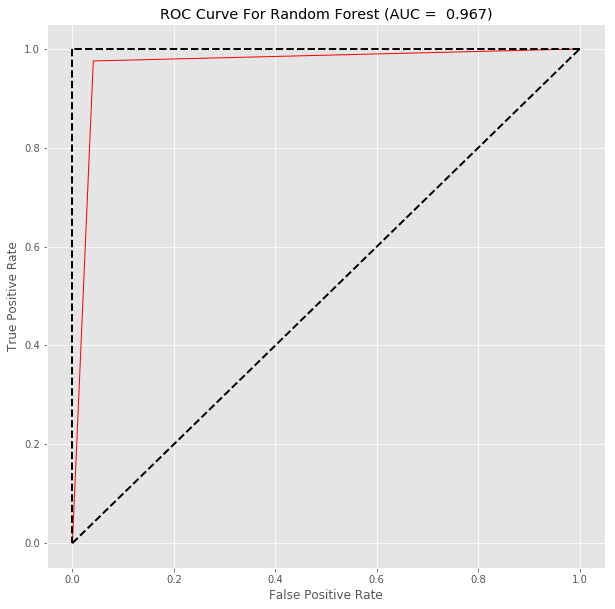

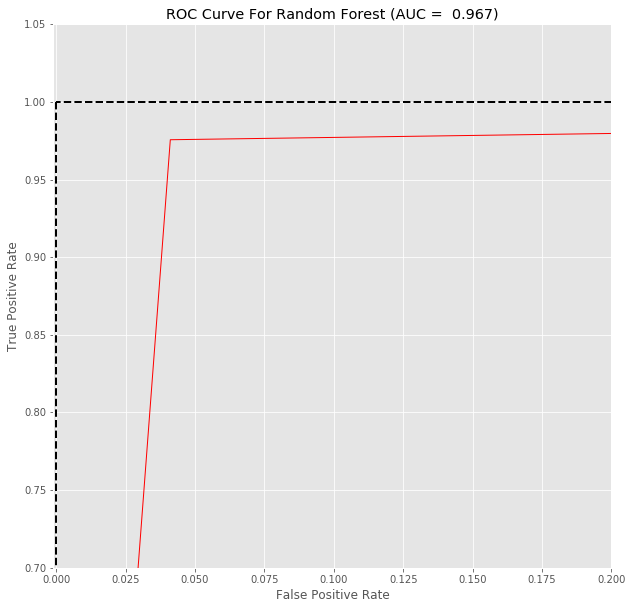

In [10]:
if __name__=='__main__':
    # Print model parameters
    print(fit_RF)

    hf.variable_importance(import_rf, ind_rf)

    hf.variable_importance_plot(import_rf_desc, ind_rf)

    print('''
    ############################################
    ##      HYPERPARAMETER OPTIMIZATION       ##
    ############################################
    ''')
  
    start = time.time()

    param_dist = {"max_depth": [2, 3, 4],
                  "bootstrap": [True, False],
                  "criterion": ["gini", "entropy"]}
    gs_rf = GridSearchCV(fit_RF, cv = 10,
    param_grid=param_dist)
    
    gs_rf.fit(training_set, class_set['diagnosis'])
    print(gs_rf.best_params_)
    end = time.time()
    print(end - start)

    print('''
    ###############################
    ##      CROSS VALIDATION     ##
    ###############################
    ''')

    # Cross validation 
    hf.cross_val_metrics(fit_RF, training_set, 
                         class_set['diagnosis'], 
                         print_results = True)
    
    print('''
    ###############################
    ##   TEST SET CALCULATIONS   ##
    ###############################
    ''')

    print(pd.crosstab(predictions_RF, 
                      test_class_set['diagnosis'], 
                      rownames=['Predicted Values'], 
                      colnames=['Actual Values']))

    print("Here is our mean accuracy on the test set:\n {0: 0.3f}"
          .format(accuracy_RF))

    print("The test error rate for our model is:\n {0: .3f}"
          .format(test_error_rate_RF))

    # ROC Curve
    hf.plot_roc_curve(fpr2, tpr2, auc_rf, 'rf')
    # Zoomed in ROC Curve
    hf.plot_roc_curve(fpr2, tpr2, auc_rf, 'rf', 
                      (-0.001, 0.2), (0.7, 1.05))
else:
    def return_rf():
        '''
        Function to output values created in script 
        '''
        return fpr2, tpr2, auc_rf, predictions_RF, test_error_rate_RF

    mean_cv_rf, std_error_rf = hf.cross_val_metrics(
        fit_RF, training_set, class_set['diagnosis'], 
        print_results = False)